# <span style="color:darkred">  Esercitazione 6 </span>


### Esercizio 6.1

#### Richiesta

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

-Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

___________________________

##### Svolgimento
Per le simulazioni sono stati usati $M = 100000$ MC steps, suddivisi in 20 blocchi.
In totale le simulazioni sono state eseguite a 13 misure di temperature differenti da T = 0.5 a T = 2, concentrate principalmente nel range $\left[0.5;1.0\right]$, dove è presente la transizione di fase.

I grafici delle quantità fisiche in funzione della temperatura sono stati plottati con la misura mediata su tutti i 20 blocchi, per osservare l'andamento del valore medio in funzione dei blocchi ci siamo concentrati sulla $T = 2$.

Nei grafici successivi si osserva che sia il Metropolis sampling sia il Gibbs sampling fittano bene, nel range di temperature considerato, con il grafico della soluzione analitica.

Per quanto riguarda invece le misure a $T = 2$, si osserva che la convergenza al valore atteso risulta sempre (entro i due sigma) per entrambi i sampling. 

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##parametri esperimento
M = 13 #esperimenti a diverse temperature
B = 20 #blocks

x = np.zeros(M)

#vettore temperature
x[0] = 0.5
x[1] = 0.525
x[2] = 0.55
x[3] = 0.575
x[4] = 0.6
x[5] = 0.7
x[6] = 0.8
x[7] = 0.9
x[8] = 1
x[9] = 1.25
x[10] = 1.5
x[11] = 1.75
x[12] = 2

T2 = 20*12 # posizione dei dati alla temperatura T = 2



1. $U(N,T) = \langle H \rangle_{h=0}$

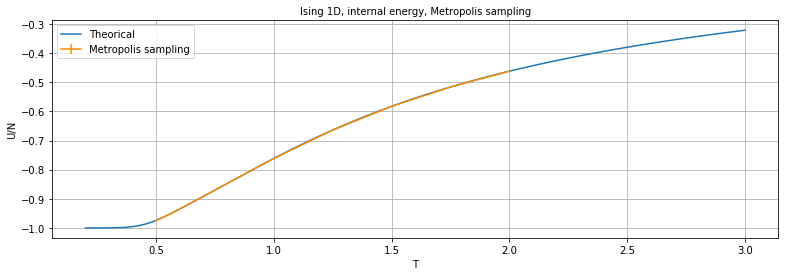

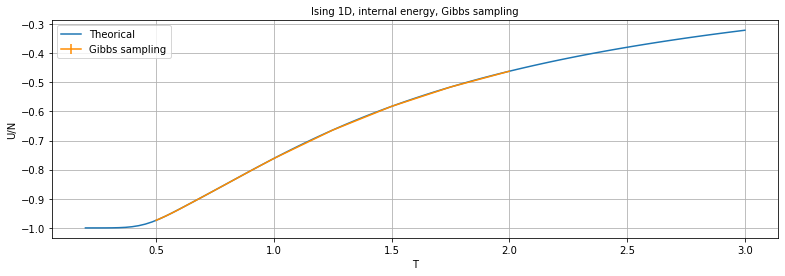

In [11]:
E = np.zeros(M)
E_Err = np.zeros(M)

##Theorical parametres
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )


#Metropolis sampling
u, u_err = np.loadtxt("ISING_1D/eneMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    E[i] = u[(i+1)*20-1]
    E_Err[i] = u_err[(i+1)*20-1]
    
plt.figure(1, figsize=(13,4))
plt.errorbar(x, E, yerr=E_Err, color='darkorange', label='Metropolis sampling') #metropolis sampling
plt.plot(T, e, label='Theorical') #theorical
plt.title('Ising 1D, internal energy, Metropolis sampling', fontsize= 10)
plt.xlabel('T', fontsize= 10)
plt.ylabel('U/N', fontsize= 10)
plt.legend(loc='best')
plt.grid(True)

#Gibbs sampling
u, u_err = np.loadtxt("ISING_1D/eneGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    E[i] = u[(i+1)*20-1]
    E_Err[i] = u_err[(i+1)*20-1]

plt.figure(2, figsize=(13,4))
plt.errorbar(x, E, yerr=E_Err, color='darkorange', label='Gibbs sampling') #gibbs sampling
plt.plot(T, e, label='Theorical') #theorical
plt.title('Ising 1D, internal energy, Gibbs sampling', fontsize= 10)
plt.xlabel('T', fontsize= 10)
plt.ylabel('U/N', fontsize= 10)
plt.legend(loc='best')
plt.grid(True)
plt.show()


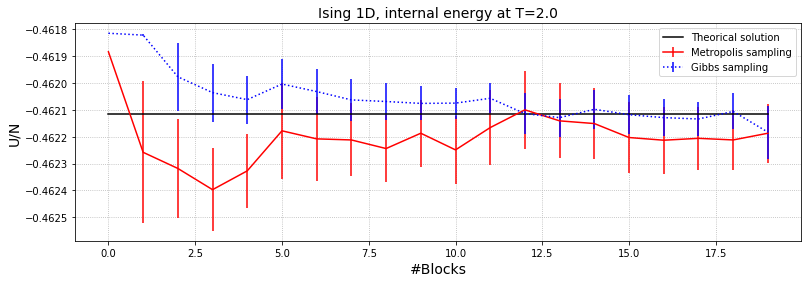

In [4]:
y = np.arange(B)
E = np.zeros(B)
E_Err = np.zeros(B)
Eth = np.zeros(B) ## energia teorica a T = 2

#Theorical
beta2 = 1/2
J = 1.0
Ns = 50
th2 = np.tanh(J/2)
thN2= th2**Ns
ch2 = 1/th2
Eth = Eth + -J*( th2 + ch2*thN2 )/( 1 + thN2 )

#Metropolis sampling
u, u_err = np.loadtxt("ISING_1D/eneMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    E[i] = u[i+T2]
    E_Err[i] = u_err[i+T2]
    
plt.figure(1, figsize=(13,4))     
plt.errorbar(y, E, yerr=E_Err, color='red', label= 'Metropolis sampling') #metropolis sampling

#Gibbs sampling
u, u_err = np.loadtxt("ISING_1D/eneGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    E[i] = u[i+T2]
    E_Err[i] = u_err[i+T2]

plt.errorbar(y, E, yerr=E_Err, color='blue', label= 'Gibbs sampling',linestyle='dotted') #gibbs sampling
plt.plot (y, Eth, color = 'black', label = 'Theorical solution')
plt.title('Ising 1D, internal energy at T=2.0', fontsize= 14)
plt.xlabel('#Blocks', fontsize= 14)
plt.ylabel('U/N', fontsize= 14)
plt.legend(loc='best')
plt.grid(True, linestyle='dotted')



plt.show()

2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 

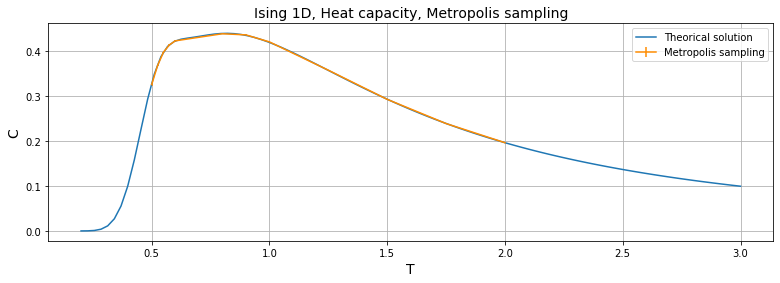

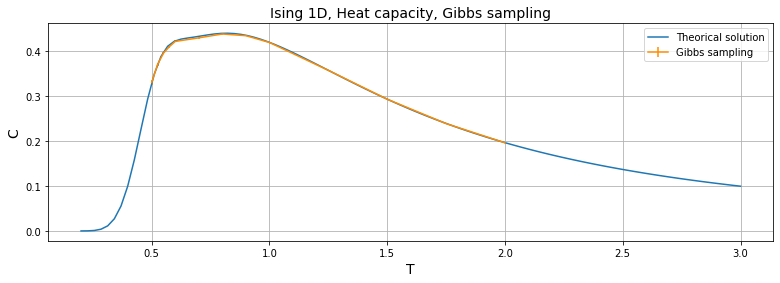

In [5]:
C = np.zeros(M)
C_Err = np.zeros(M)

##Theorical
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#Metropolis sampling
c, c_err = np.loadtxt("ISING_1D/heatMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    C[i] = c[(i+1)*20-1]
    C_Err[i] = c_err[(i+1)*20-1]
    
plt.figure(1, figsize=(13,4))
plt.errorbar(x, C, yerr=C_Err, color='darkorange', label = 'Metropolis sampling') #metropolis sampling
plt.plot(T, heat, label='Theorical solution') #theorical
plt.title('Ising 1D, Heat capacity, Metropolis sampling', fontsize= 14)
plt.xlabel('T', fontsize= 14)
plt.ylabel('C', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)

#Gibbs sampling
c, c_err = np.loadtxt("ISING_1D/heatGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    C[i] = c[(i+1)*20-1]
    C_Err[i] = c_err[(i+1)*20-1]
    
plt.figure(2, figsize=(13,4))
plt.errorbar(x, C, yerr=C_Err, color='darkorange', label= 'Gibbs sampling') #gibbs sampling
plt.plot(T, heat, label = 'Theorical solution' ) #theorical
plt.title('Ising 1D, Heat capacity, Gibbs sampling', fontsize= 14)
plt.xlabel('T', fontsize= 14)
plt.ylabel('C', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)

plt.show()

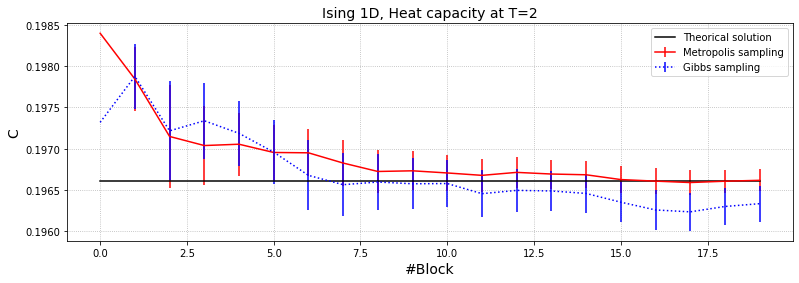

In [6]:
C = np.zeros(B)
C_Err = np.zeros(B)
Cth = np.zeros(B)

##Theorical
Cth= Cth + ((beta2*J)**2)*(((1+thN2+(Ns-1)*(th2**2)+(Ns-1)*(ch2**2)*thN2)/(1+thN2))-Ns*((th2+ch2*thN2)/(1+thN2))**2)


#Metropolis sampling
c, c_err = np.loadtxt("ISING_1D/heatMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    C[i] = c[i+T2]
    C_Err[i] = c_err[i+T2]
    
plt.figure(1, figsize=(13,4))    
plt.errorbar(y, C, yerr=C_Err, color='red', label = 'Metropolis sampling') #metropolis sampling


#Gibbs sampling
c, c_err = np.loadtxt("ISING_1D/heatGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    C[i] = c[i+T2]
    C_Err[i] = c_err[i+T2]
    
plt.errorbar(y, C, yerr=C_Err, color='blue', linestyle='dotted', label = 'Gibbs sampling') #gibbs sampling
plt.plot(y, Cth, color = 'black', label = 'Theorical solution')
plt.title('Ising 1D, Heat capacity at T=2', fontsize= 14)
plt.xlabel('#Block', fontsize= 14)
plt.ylabel('C', fontsize= 14)
plt.legend(loc='best')
plt.grid(True, linestyle='dotted')

plt.show()

3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$

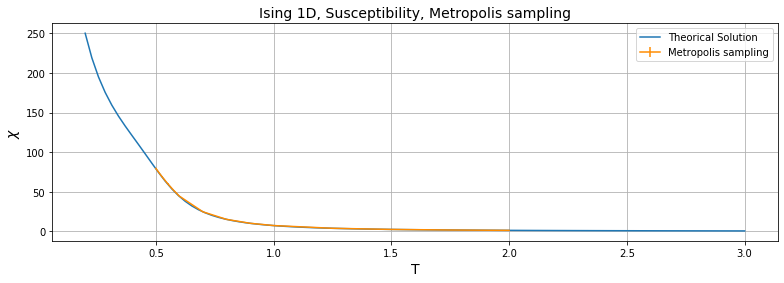

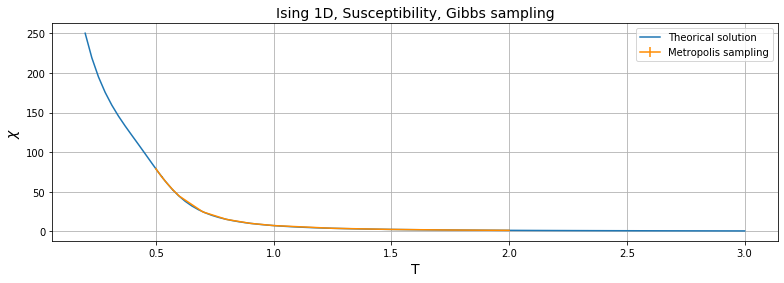

In [7]:
Chi = np.zeros(M)
Chi_Err = np.zeros(M)

#theorical
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#Metropolis sampling
chi, chi_err = np.loadtxt("ISING_1D/chiMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    Chi[i] = chi[(i+1)*20-1]
    Chi_Err[i] = chi_err[(i+1)*20-1]
    
plt.figure(1, figsize=(13,4))
plt.errorbar(x, Chi, yerr=Chi_Err, color='darkorange', label = 'Metropolis sampling') #metropolis sampling
plt.plot(T, X, label='Theorical Solution') #theorical
plt.title('Ising 1D, Susceptibility, Metropolis sampling', fontsize= 14)
plt.xlabel('T', fontsize= 14)
plt.ylabel('$\chi$', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)


#Gibbs sampling
chi, chi_err = np.loadtxt("ISING_1D/chiGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    Chi[i] = chi[(i+1)*20-1]
    Chi_Err[i] = chi_err[(i+1)*20-1]
    
plt.figure(2, figsize=(13,4))
plt.errorbar(x, Chi, yerr=Chi_Err, color='darkorange', label = 'Metropolis sampling') #gibbs sampling
plt.plot(T, X, label = 'Theorical solution') #theorical
plt.title('Ising 1D, Susceptibility, Gibbs sampling', fontsize= 14)
plt.xlabel('T', fontsize= 14)
plt.ylabel('$\chi$', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)

plt.show()

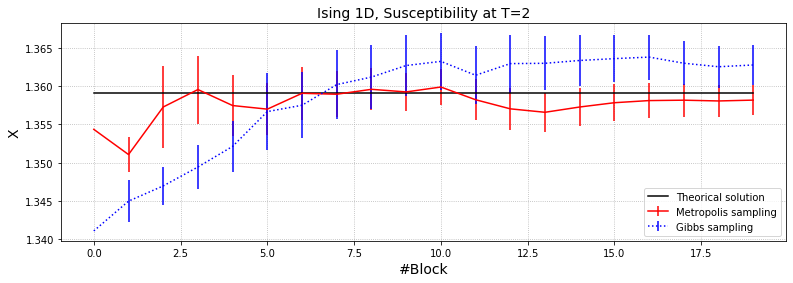

In [8]:
Chi = np.zeros(B)
Chi_Err = np.zeros(B)
Chth = np.zeros(B)

#theorical
Chth = Chth + beta2*np.exp(2*beta2*J)*(1-thN2)/(1+thN2)

#Metropolis sampling
chi, chi_err = np.loadtxt("ISING_1D/chiMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    Chi[i] = chi[i+T2]
    Chi_Err[i] = chi_err[i+T2]
    
plt.figure(1, figsize=(13,4))    
plt.errorbar(y, Chi, yerr=Chi_Err, color='red', label = 'Metropolis sampling') #metropolis sampling


#Gibbs sampling
chi, chi_err = np.loadtxt("ISING_1D/chiGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    Chi[i] = chi[i+T2]
    Chi_Err[i] = chi_err[i+T2]
    
plt.errorbar(y, Chi, yerr=Chi_Err, color='blue', linestyle='dotted', label = 'Gibbs sampling') #gibbs sampling
plt.plot(y, Chth, color = 'black', label = 'Theorical solution')
plt.title('Ising 1D, Susceptibility at T=2', fontsize= 14)
plt.xlabel('#Block', fontsize= 14)
plt.ylabel('X', fontsize= 14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='dotted')

plt.show()

4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

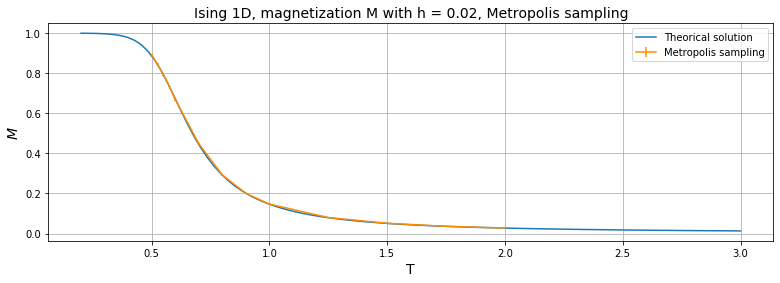

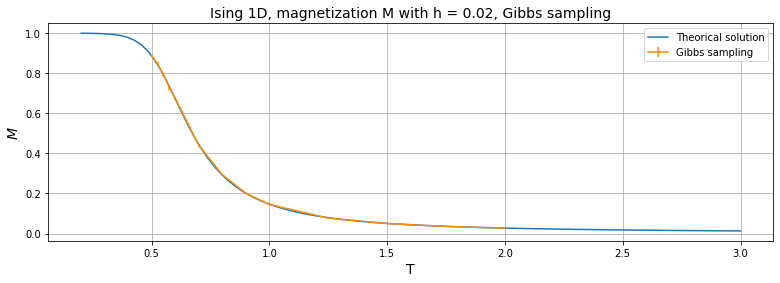

In [9]:
Ma = np.zeros(M)
Ma_Err = np.zeros(M)

#theorical
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
Mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#Metropolis Sampling
m, m_err = np.loadtxt("ISING_1D/magnMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,M):
    Ma[i] = m[(i+1)*20-1]
    Ma_Err[i] = m_err[(i+1)*20-1]
plt.figure(1, figsize=(13,4))
plt.errorbar(x, Ma, yerr=Ma_Err, color='darkorange', label= 'Metropolis sampling') #metropolis sampling
plt.plot(T, Mag, label = 'Theorical solution') #theorical
plt.title('Ising 1D, magnetization M with h = 0.02, Metropolis sampling', fontsize= 14)
plt.xlabel('T', fontsize= 14)
plt.ylabel('$M$', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)


#Gibbs Sampling
m, m_err = np.loadtxt("ISING_1D/magnGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0, M):
    Ma[i] = m[(i+1)*20-1]
    Ma_Err[i] = m_err[(i+1)*20-1]
    
plt.figure(2, figsize=(13,4)) 
plt.errorbar(x, Ma, yerr=Ma_Err, color='darkorange', label= 'Gibbs sampling') #gibbs sampling
plt.plot(T, Mag, label = 'Theorical solution') #theorical
plt.title('Ising 1D, magnetization M with h = 0.02, Gibbs sampling', fontsize= 14)
plt.xlabel('T', fontsize= 14)
plt.ylabel('$M$', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)
plt.show()



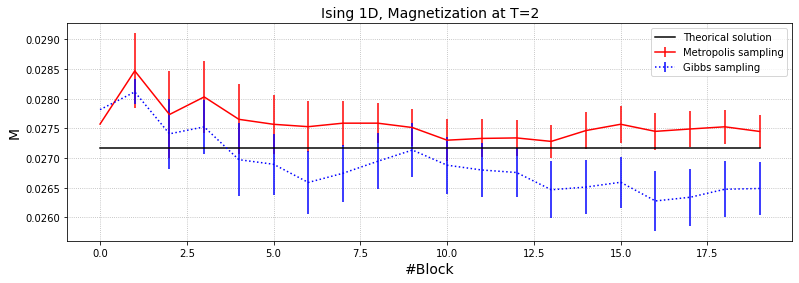

In [10]:
Ma = np.zeros(B)
Ma_Err = np.zeros(B)
Math = np.zeros(B)

#Theorical
b = 1/2

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
Math = Math+ (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#Metropolis sampling
m, m_err = np.loadtxt("ISING_1D/magnMetr.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    Ma[i] = m[i+T2]
    Ma_Err[i] = m_err[i+T2]
    
plt.figure(1, figsize=(13,4))    
plt.errorbar(y, Ma, yerr=Ma_Err, color='red', label = 'Metropolis sampling') #metropolis sampling


#Gibbs sampling
m, m_err = np.loadtxt("ISING_1D/magnGibbs.dat", usecols = (2,3), delimiter=' ', unpack='true')
for i in range (0,20):
    Ma[i] = m[i+T2]
    Ma_Err[i] = m_err[i+T2]
    
plt.errorbar(y, Ma, yerr=Ma_Err, color='blue', linestyle='dotted', label = 'Gibbs sampling') #gibbs sampling
plt.plot(y, Math, color = 'black', label = 'Theorical solution')
plt.title('Ising 1D, Magnetization at T=2', fontsize= 14)
plt.xlabel('#Block', fontsize= 14)
plt.ylabel('M', fontsize= 14)
plt.legend(loc='best')
plt.grid(True, linestyle='dotted')

plt.show()